In [6]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
#fetch dataset
adult = fetch_ucirepo(id=2) 

In [8]:
#data (as pandas dataframes)
X = adult.data.features 
y = adult.data.targets

In [9]:
#importing dataset
df = pd.concat([X,y],axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Dataset Analysis

In [10]:
df.shape

(48842, 15)

In [11]:
# variable information
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
# Get Catogerical Columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


In [18]:
# Get Numerical Columns
print("Numerical Columns: ")
for col in df.columns:
    if df[col].dtype == 'int64':
        print(col)

Numerical Columns: 
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


In [17]:
# Get value counts of categorical columns
for col in df:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

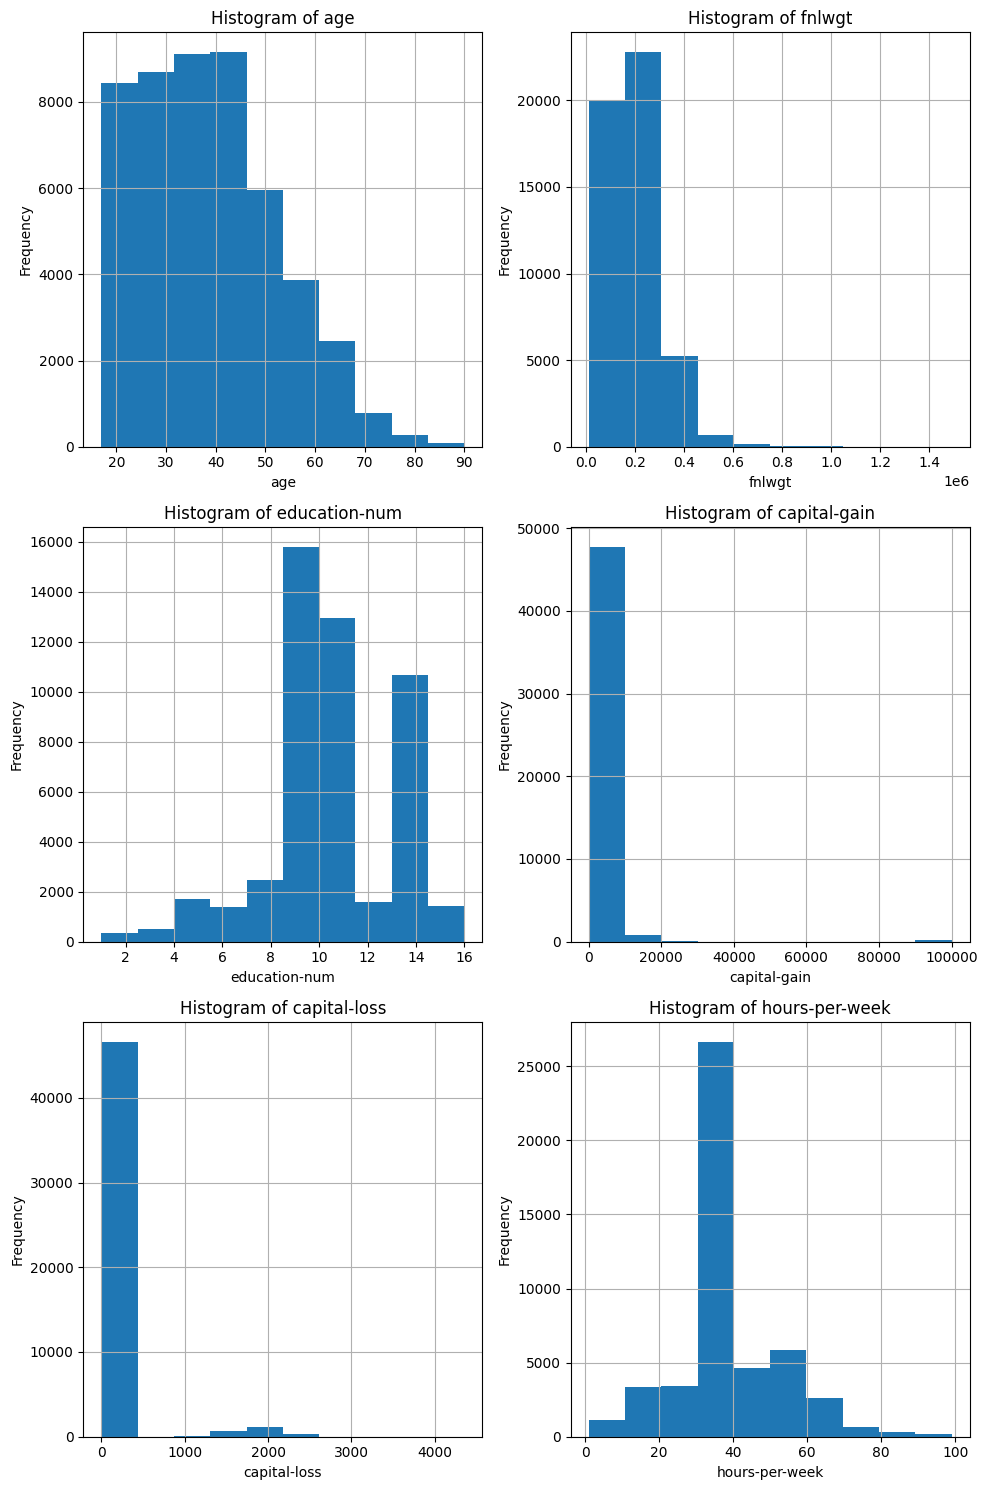

In [19]:
# Get value counts of numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    df[col].hist(ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
#Saving dataset to csv file
df.to_csv('Dataset/adult.csv', index=False)

# Data Preprocessing

### Data Cleaning

In [30]:
#Load the data
df = pd.read_csv('Dataset/adult.csv')

In [34]:
#Fixing type errors in classes 
df["income"] = df["income"].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [35]:
#Checking value counts in new classes
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [36]:
# drop unwanted columns
df.drop('education-num', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [37]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

Before removing duplicates: 48


In [38]:
# Remove Duplicates
df =df.drop_duplicates(keep='first')

In [39]:
print("After removing duplicates:", df.duplicated().sum())

After removing duplicates: 0


In [41]:
#check for '?' values
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [42]:
#convert '?' values into null values 
df=df.replace('?', np.nan)

In [43]:
#check for null values
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [44]:
df = df.dropna()

In [45]:
#check for null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
#check for '?' values
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Dataset After Cleaning

In [49]:
#Checking value counts in classes
df["income"].value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

In [50]:
df.shape

(45175, 14)

In [51]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
#Saving cleaned dataset to csv file
df.to_csv('Dataset/Cleaned_adult.csv', index=False)

# Data Visualization

In [53]:
#Load Cleaned dataset
c_df = pd.read_csv('Dataset/Cleaned_adult.csv')